In [75]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [45]:
path_to_dataset = './fake_news_dataset.csv'


In [46]:
data = pd.read_csv(path_to_dataset, index_col=0)

In [47]:
data.head()

,date,day,flag,link,month,place,publisher,year,Text
0,2018/03/29,29.0,0,http://timesofindia.indiatimes.com//city/nagpu...,3.0,nagpur,TOI,2018.0,NAGPUR: Villagers in Naxalite infested Gadchir...
1,2017/01/24,24.0,0,http://timesofindia.indiatimes.com//india/jk-g...,1.0,NaN,TOI,2017.0,NEW DELHI: The Jammu & Kashmir government has ...
2,2017/01/31,31.0,0,http://timesofindia.indiatimes.com//city/kolha...,1.0,kolhapur,TOI,2017.0,KOLHAPUR: Robbers continue to give sleepless n...
3,2018/03/26,26.0,0,http://timesofindia.indiatimes.com//city/hubba...,3.0,hubballi,TOI,2018.0,"HUBBALLI: An iconic building, which is propose..."
4,2017/02/20,20.0,0,http://timesofindia.indiatimes.com//city/mumba...,2.0,mumbai,TOI,2017.0,MUMBAI: MNS chief said that the would lead...


## Validating Data

In [48]:
data['day'].unique()

array([29., 24., 31., 26., 20., 15., 28., 23., 19.,  5., 17., 18., 21.,
       25., 12., 30.,  6.,  4.,  2., 22., 10., 14.,  1., 27., 11.,  7.,
        9.,  8., 13.,  3., 16., nan])

In [49]:
data['month'].unique()

array([ 3.,  1.,  2.,  4.,  7.,  5.,  9.,  6., 10.,  8., 11., 12., nan])

In [50]:
data['year'].unique()

array([2018., 2017.,   nan])

## Missing Values

In [51]:
data.isnull().sum()

date             0
day              1
flag             0
link             0
month            1
place        63713
publisher        0
year             1
Text             0
dtype: int64

In [52]:
data['place'].isnull().sum()/data.shape[0]

0.3032133101091726

'place' has 30% missing values. So this attribute is dropped.

In [53]:
data.drop('place', axis=1, inplace=True)

'day' and 'year' have 1 missing value. So these observations are dropped only.

In [54]:
data.dropna(axis=0, inplace=True)

In [55]:
data.isnull().sum()

date         0
day          0
flag         0
link         0
month        0
publisher    0
year         0
Text         0
dtype: int64

## Rearranging Columns

In [56]:
data.columns

Index(['date', 'day', 'flag', 'link', 'month', 'publisher', 'year', 'Text'], dtype='object')

In [57]:
arranged_data = data[['Text', 'date', 'day', 'link', 'month', 'publisher', 'year', 'flag']]

In [58]:
arranged_data.head()

,Text,date,day,link,month,publisher,year,flag
0,NAGPUR: Villagers in Naxalite infested Gadchir...,2018/03/29,29.0,http://timesofindia.indiatimes.com//city/nagpu...,3.0,TOI,2018.0,0
1,NEW DELHI: The Jammu & Kashmir government has ...,2017/01/24,24.0,http://timesofindia.indiatimes.com//india/jk-g...,1.0,TOI,2017.0,0
2,KOLHAPUR: Robbers continue to give sleepless n...,2017/01/31,31.0,http://timesofindia.indiatimes.com//city/kolha...,1.0,TOI,2017.0,0
3,"HUBBALLI: An iconic building, which is propose...",2018/03/26,26.0,http://timesofindia.indiatimes.com//city/hubba...,3.0,TOI,2018.0,0
4,MUMBAI: MNS chief said that the would lead...,2017/02/20,20.0,http://timesofindia.indiatimes.com//city/mumba...,2.0,TOI,2017.0,0


## Feature Selection

### Day  

In [59]:
grp = arranged_data.groupby('day')['flag'].sum()

<BarContainer object of 31 artists>

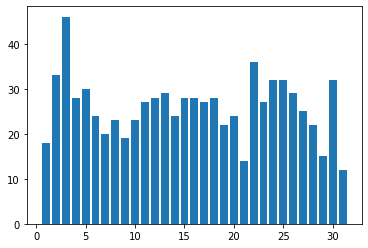

In [60]:
plt.bar(grp.index, grp.values)

### Month 

In [63]:
grp = arranged_data.groupby('month')['flag'].sum()

<BarContainer object of 12 artists>

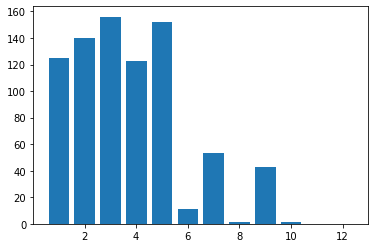

In [64]:
plt.bar(grp.index, grp.values)

In [65]:
data.drop('month', axis=1, inplace=True)

### Year, Publisher, date, day, link

In [67]:
data.drop(['year','publisher','date','day','link'], axis=1, inplace=True)

In [71]:
data.head()

,flag,Text
0,0,NAGPUR: Villagers in Naxalite infested Gadchir...
1,0,NEW DELHI: The Jammu & Kashmir government has ...
2,0,KOLHAPUR: Robbers continue to give sleepless n...
3,0,"HUBBALLI: An iconic building, which is propose..."
4,0,MUMBAI: MNS chief said that the would lead...


## X-y Split


In [78]:
X = data.iloc[:,1]
y = data.iloc[:,0]

## Train-Test Split

In [84]:
X = X.sample(frac = 1)
y = y.sample(frac = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [88]:
print(X_train.shape)
print(X_test.shape)

(168100,)
(42025,)
